In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [3]:
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}


In [4]:
print(centroids)

{1: [21, 72], 2: [74, 54], 3: [58, 21]}


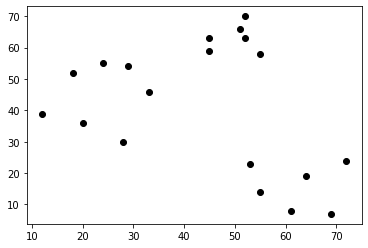

In [5]:
plt.scatter(df['x'], df['y'], color='k')

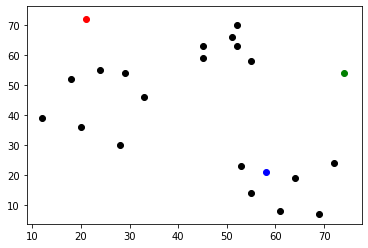

In [6]:
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

In [18]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 20
            )
        )
    c_d = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #print(c_d)
    df['closest'] = df.loc[:, c_d].idxmin(axis=1)

    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df   

['distance_from_1', 'distance_from_2', 'distance_from_3']


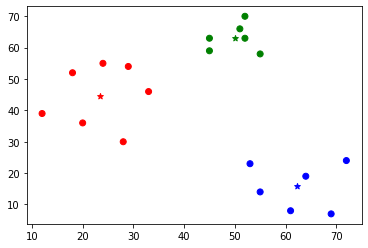

In [19]:
df = assignment(df, centroids)
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],marker='*')

In [22]:
df

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,12.714286,45.033629,55.408834,1,r
1,20,36,9.231711,40.472556,46.891423,1,r
2,28,30,15.271689,39.799846,37.141247,1,r
3,18,52,9.200710,33.892395,57.214266,1,r
4,29,54,10.951656,22.913485,50.673519,1,r
5,33,46,9.677451,24.159769,42.076980,1,r
6,24,55,10.444215,27.252421,54.803943,1,r
7,45,59,25.952075,6.508541,46.516723,2,g
8,45,63,28.371443,5.002777,50.250760,2,g
9,52,70,38.248383,7.120003,55.143500,2,g


In [10]:
centroids[1][0] = np.mean(df[df['closest'] == 1]['x'])
centroids[1][1] = np.mean(df[df['closest'] == 1]['y'])
print(centroids)

{1: [28.25, 50.5], 2: [74, 54], 3: [58, 21]}


In [11]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)

{1: [28.25, 50.5], 2: [52.5, 64.25], 3: [57.42857142857143, 17.857142857142858]}


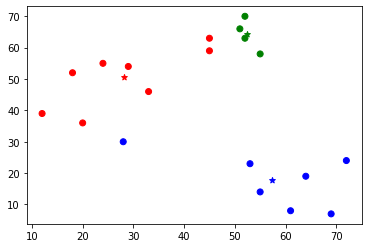

In [12]:

plt.scatter(df['x'], df['y'], color=df['color'])

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],marker='*')

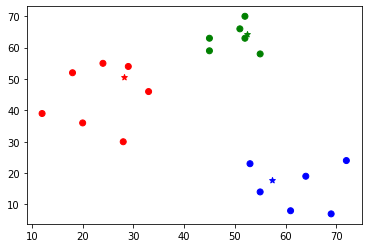

In [13]:
df = assignment(df, centroids)



plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],marker='*')

plt.show()

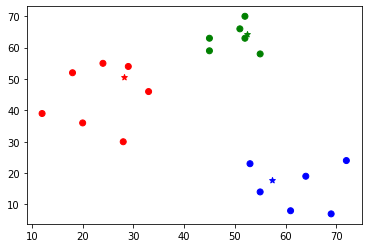

In [14]:
df = assignment(df, centroids)
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],marker='*')

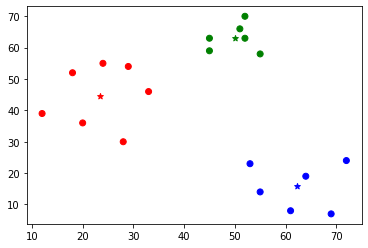

In [15]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
    
    
plt.scatter(df['x'], df['y'], color=df['color'])

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],marker='*')

plt.show()